# S03_T02_Visualització_gràfica_múltiples_variables

### Ex1:Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips"

Pràctica realitzada al fitxer: **Beth_03 EXAMINING DATA.ipynb** (primera part)

## **Exercici Pràctic_ Scatter Plots**

Scatter Plots o Gráficos de Puntos pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales

### **S'utilitzarà el dataset "tips" i sel·leccionem unes quantes variables**

In [1]:
# importem llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
#carreguem dataset "tips"
tips = pd.read_csv("tips.csv", sep = ',', encoding = 'utf-8')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.shape

(244, 7)

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
#Sabem que tenim 7 columnes i 244 files, i d'aquestes totes són Non_null

In [8]:
tips.ndim

2

In [9]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [12]:
#no calia demanar les columnes, ni el dtypes, ja que quan hem fet tips.info ja obtenim aquesta informació dels noms
#i types de les columnes

In [14]:
#ens demanen crear una columna nova que ens doni el percentatge de les propines: tip_pct
tips["tip_pct"] = round((tips["tip"] / (tips["total_bill"] - tips["tip"]))*100, 2)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,25.62
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.94
241,22.67,2.00,Male,Yes,Sat,Dinner,2,9.68
242,17.82,1.75,Male,No,Sat,Dinner,2,10.89


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

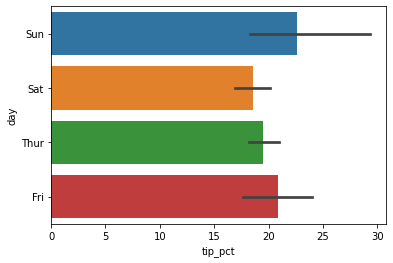

In [16]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

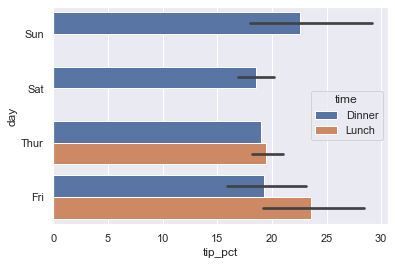

In [19]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")
plt.show()
sns.set(style ="darkgrid")

In [20]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [21]:
round(tips.describe(include="all"), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [23]:
#substituim tots els NAN values per zero
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [25]:
round((tips["tip"]).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [28]:
np.round((tips["tip"]).median(), 3)

2.9

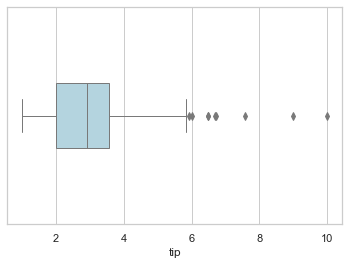

In [29]:
sns.set(style="whitegrid")
ax=sns.boxplot(x=tips["tip"], color="lightblue", fliersize=5, orient="v", linewidth=1, width=0.3)

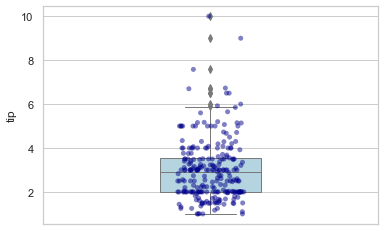

In [32]:
ax=sns.boxplot(y="tip", data=tips, color="lightblue", fliersize=5, orient="v", linewidth=1, width=0.3)
ax=sns.stripplot(y=tips["tip"], orient="v", color="darkblue", alpha=0.5)

### Una variable Numèrica:"tip_pct"

In [33]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

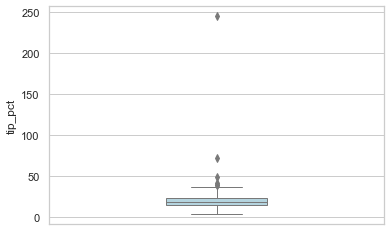

In [37]:
sns.boxplot(y="tip_pct", data=tips[tips.tip<10], color= "lightblue", fliersize=5, orient="v", linewidth=1, width=0.3);

### Dues variables: Numèrica:"tip_pct" i Categòrica: "day"

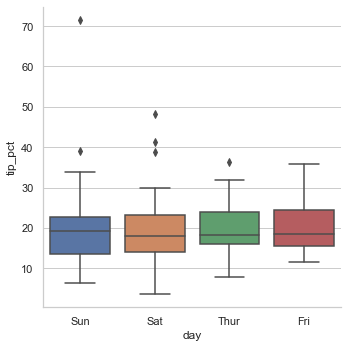

In [38]:
## afegim variable categòrica "day" en x:
ax=sns.catplot(x="day", y="tip_pct", kind="box", data=tips[tips.tip_pct<245]);

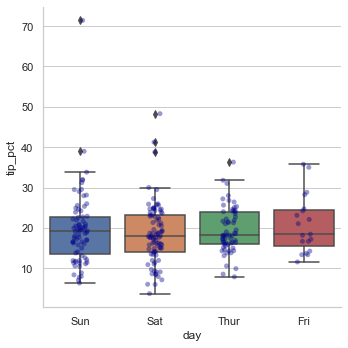

In [39]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x="day", y="tip_pct", kind="box", data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x="day", y="tip_pct", data=tips[tips.tip_pct < 245], orient='v', color="darkblue", alpha= 0.4);

### Tres variables: Numèrica:"tip_pct" i dues Categòriques: "day" i "time

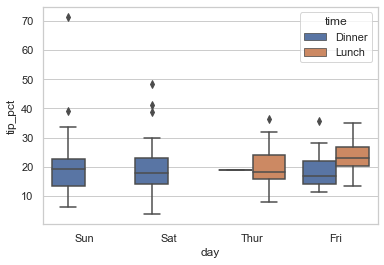

In [41]:
sns.boxplot(x="day", y="tip_pct", hue= "time", data=tips[tips.tip_pct<245]);

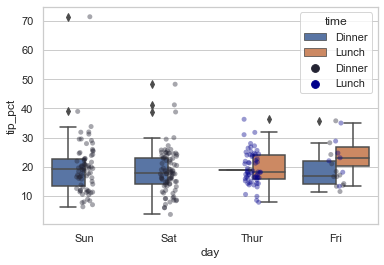

In [42]:
sns.boxplot(x="day", y="tip_pct", hue= "time", data=tips[tips.tip_pct<245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

## Facet Grids y Categorical DataFrame

Nos permite profundizar todavía más en el analisis, añadiendo una variable categórica adicional.

Usando el método factorplot( ) de "Facet Grid" :

### Quatre variables: Numèrica:"tip_pct" i tres Categòriques: "day","time", "smoker"

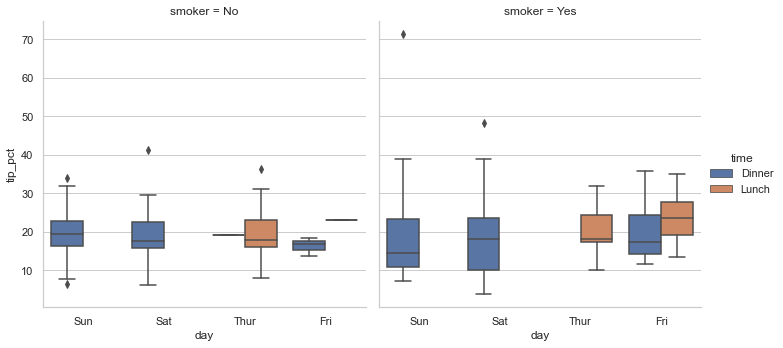

In [45]:
sns.catplot(x="day", y="tip_pct", hue="time", col= "smoker", kind="box", data=tips[tips.tip_pct < 245]);

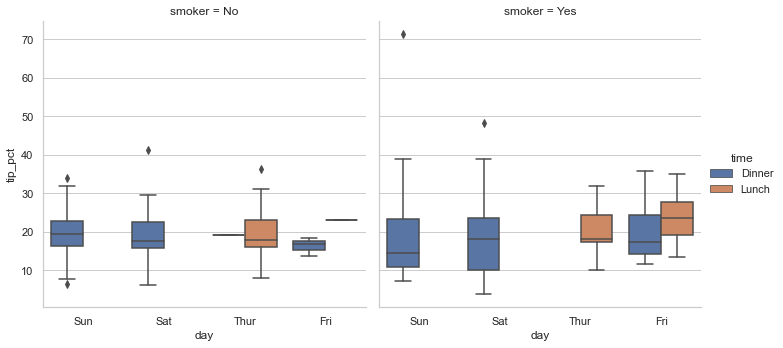

In [47]:
sns.catplot(x="day", y="tip_pct", hue="time", col= "smoker", kind="box", data=tips[tips.tip_pct < 245]);

### Ex2: Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

### Ex3: En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior